In [1]:
import xgboost as xgb

C:\ProgramData\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\ProgramData\Anaconda3\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


#### **集成算法**

##### 集成算法有袋装法（bagging）和提升法（boosting），其中，袋装法以随机森林（RandomForest）为代表，提升法   
##### 以梯度提升树（GBDT）为基础，衍生出了Adaboost、XGboost、LightGBM、catboost，GBDT以CART为主流算法，有   
##### 分类树和回归树。
***

##### **决策树**：每个被放入模型的样本都会落到叶子节点上，回归树看均值，分类树看投票。   
##### **GBDT**：每个样本的预测结果可以表示为所有树上的样本的加权求和。   
##### **XGB**：每个叶子节点上会有一个预测分数，被称为叶子权重，这个叶子权重就是所有在这   
#####    个叶子节点上的样本在这颗树上的回归取值。

In [6]:
from xgboost import XGBRegressor as XGBR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.linear_model import LinearRegression as LR
from sklearn.datasets import load_boston
from sklearn.model_selection import KFold,cross_val_score as CVS,train_test_split as TTS
from sklearn.metrics import mean_squared_error as MSE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time
import datetime

In [7]:
data = load_boston()

In [8]:
X = data.data
y = data.target

In [9]:
X.shape

(506, 13)

In [5]:
y.shape

(506,)

In [6]:
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
len(np.unique(y).tolist())

229

In [8]:
min(y)

5.0

In [9]:
max(y)

50.0

In [10]:
Xtrain,Xtest,Ytrain,Ytest = TTS(X,y,test_size=0.3,random_state=420)

In [11]:
Xtrain.shape

(354, 13)

In [12]:
pd.DataFrame(Xtrain).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 13 columns):
0     354 non-null float64
1     354 non-null float64
2     354 non-null float64
3     354 non-null float64
4     354 non-null float64
5     354 non-null float64
6     354 non-null float64
7     354 non-null float64
8     354 non-null float64
9     354 non-null float64
10    354 non-null float64
11    354 non-null float64
12    354 non-null float64
dtypes: float64(13)
memory usage: 36.0 KB


In [13]:
reg = XGBR(n_estimators=100).fit(Xtrain,Ytrain)

In [14]:
reg.predict(Xtest)

array([ 6.6689262, 22.34918  , 31.052807 , 13.911593 ,  9.467967 ,
       22.658588 , 14.514282 , 15.092699 , 15.293644 , 12.680115 ,
       24.140797 , 35.890083 , 21.573483 , 27.07066  , 19.052658 ,
        9.89033  , 23.386076 , 23.588493 , 23.311466 , 22.401644 ,
       18.98444  , 15.766946 , 25.8352   , 20.193802 , 19.982517 ,
       15.611423 , 22.883228 , 29.838228 , 22.815304 , 16.779034 ,
       37.13194  , 20.133307 , 19.67352  , 23.525528 , 22.845137 ,
       23.87397  , 15.17887  , 23.45934  , 16.685331 , 31.761686 ,
       18.525843 , 22.441063 , 38.48728  , 17.93719  , 15.10122  ,
       28.980541 , 46.363487 , 12.842797 ,  9.618281 , 35.40579  ,
       25.657566 , 20.605602 , 20.800055 , 49.228447 , 31.355848 ,
       29.382515 , 18.911947 , 21.049877 , 16.165169 , 18.098577 ,
       14.659002 , 21.720213 , 19.413454 , 28.932102 , 30.573524 ,
       19.228426 , 20.531511 , 15.666288 , 23.52929  , 19.30554  ,
       28.384985 , 42.83562  , 29.429724 , 23.306015 , 19.7412

In [15]:
reg.score(Xtest,Ytest)

0.9050988954757183

In [16]:
MSE(Ytest,reg.predict(Xtest))

8.830916470718748

In [17]:
reg.feature_importances_

array([0.01902167, 0.0042109 , 0.01478317, 0.00553536, 0.02222195,
       0.37914094, 0.01679687, 0.04698721, 0.04073574, 0.05491758,
       0.0668422 , 0.00869463, 0.32011184], dtype=float32)

##### **交叉验证在XGboost和LinearRegression和DT模型上的效果怎么样？**

In [18]:
reg = XGBR(n_estimators=100)

In [19]:
CVS(reg,Xtrain,Ytrain,cv=5).mean()   # 不严谨交叉验证

0.799506280269948

In [20]:
CVS(reg,X,y,cv=5).mean()  # 严谨的

0.6460769822362151

In [21]:
CVS(reg,Xtrain,Ytrain,cv=5,scoring="neg_mean_squared_error").mean()

-16.215644658473447

In [22]:
lr = LR()

In [23]:
CVS(lr,Xtrain,Ytrain,cv=5).mean()

0.6835070597278081

In [24]:
CVS(lr,Xtrain,Ytrain,cv=5,scoring='neg_mean_squared_error').mean()

-25.34950749364843

In [25]:
rfr = RFR(n_estimators=100,random_state=420)

In [26]:
CVS(rfr,Xtrain,Ytrain,cv=5).mean()

0.7992209309552909

In [27]:
CVS(rfr,Xtrain,Ytrain,cv=5,scoring="neg_mean_squared_error").mean()

-16.785438601287733

###### *由此可见，随机森林和XGBoost效果相差不大，线性回归就显得不行了。*

In [28]:
reg = XGBR(n_estimators=10,silent=False)

In [29]:
CVS(reg,Xtrain,Ytrain,cv=5,scoring="neg_mean_squared_error").mean()

[13:41:06] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:41:06] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:41:06] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings bu

-18.63373361656663

In [30]:
def plot_learning_curve(estimator,title,X,y
                       ,ax=None
                       ,ylim=None
                       ,cv=None
                       ,n_jobs=None
                       ):
    from sklearn.model_selection import learning_curve
    import matplotlib.pyplot as plt
    import numpy as np
    train_sizes,train_scores,test_scores = learning_curve(estimator
                                                         ,X,y
                                                         ,cv=5
                                                         ,shuffle=True
                                                         ,n_jobs=n_jobs)
    if ax == None:
        ax = plt.gca()
    else:
        ax = plt.figure()
    ax.set_title(title)
    if ylim is not None:
        ax.set_ylim(*ylim)
    ax.set_xlabel("Training score")
    ax.set_ylabel("Score")
    ax.grid()
    ax.plot(train_sizes,np.mean(train_scores,axis=1),'o-',color='r',label='Training score')
    ax.plot(train_sizes,np.mean(test_scores,axis=1),'o-',color='g',label='Score')
    ax.legend(loc="best")
    return ax

In [12]:
cv = KFold(n_splits=5,shuffle=True,random_state=42)

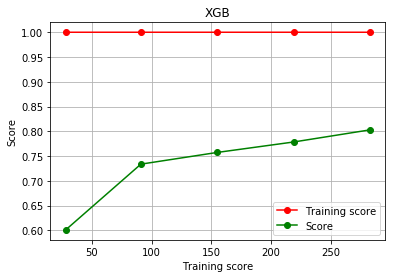

In [32]:
plot_learning_curve(XGBR(n_estimators=100,random_state=420),"XGB",Xtrain,Ytrain,ax=None,cv=cv)
plt.show()

160 0.8320776685832459


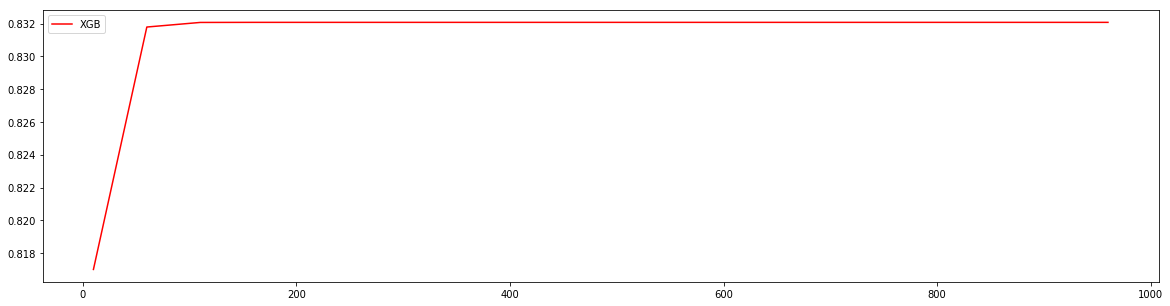

In [33]:
axisx = range(10,1010,50)
rs = []
for i in axisx:
    reg = XGBR(n_estimators=i,random_state=420)
    rs.append(CVS(reg,Xtrain,Ytrain,cv=cv).mean())
print(axisx[rs.index(max(rs))],max(rs))
plt.figure(figsize=[20,5])
plt.plot(axisx,rs,c="red",label="XGB")
plt.legend()
plt.show()

##### 进化的学习曲线，方差与泛华误差   
###### 泛华误差由偏差、方差、噪声组成

***
##### 训练数据集与一般化的数据集的损失之间的差异叫做泛化误差（generalization error）   
##### bias与variance分别从两个方面来描述我们学习到的模型与真实模型之间的差距。前者度量单个模型学习能力，后者度量同一个模型在不同数据集上的稳定性。   
##### bias是**所有可能的train**训练出的所有模型的输出**平均值**与**真实模型**的输出值之间的差异。   
##### variance是不同train数据集训练出的模型输出值之间的差异。
##### 噪音：当前任务上任何学习算法所能达到的期望泛华误差的下界，刻画了学习任务本身的难度。
##### Bagging算法是对训练样本进行采样，产生出不同的子集，在从每个数据子集中训练出一个分类器，取这些分类器的平均，所以是降低模型方差。而Boosting则是迭代算法，每次迭代都根据上次迭代预测结果对样本进行权重调整，所以随着迭代不断进行，误差会越来越小，偏差会不断降低。而k折交叉验证，希望通过多次平均可以学习得到更符合真实数据分布的模型，偏差就小了，但是这样模型就更加拟合训练数据集，方差就变大了   
#### **降低偏差**：避免欠拟合，1、寻找更好的特征；2、用更多的特征；   
#### **降低方差**：避免过拟合，1、增大数据集；2、减小数据特征，减小数据维度，较小模型复杂度；3、正则化；4、交叉验证；

100 0.8320924479019667 0.005344209691331517 0.03353715574288529


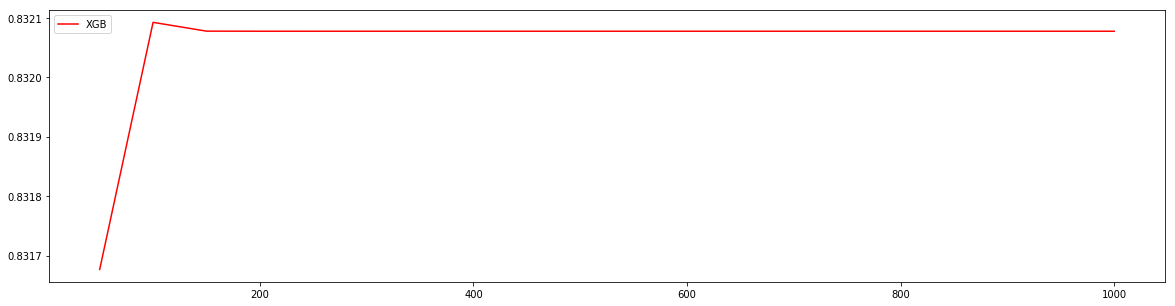

In [34]:
axisx = range(50,1050,50)
rs = []   # 偏差
var = []   # 方差
ge = []    # 泛化误差可控的部分
for i in axisx:
    reg = XGBR(n_estimators=i,random_state=420)
    cvresult = CVS(reg,Xtrain,Ytrain,cv=cv)
    
    rs.append(cvresult.mean())
    var.append(cvresult.var())
    ge.append((1-cvresult.mean())**2+cvresult.var())
print(axisx[ge.index(min(ge))],rs[ge.index(min(ge))],var[ge.index(min(ge))],min(ge))
plt.figure(figsize=[20,5])
plt.plot(axisx,rs,c="red",label="XGB")
plt.legend()
plt.show()

100 0.8320924479019667 0.005344209691331517
100 0.8320924479019667 0.005344209691331517
100 0.8320924479019667 0.005344209691331517
100 0.8320924479019667 0.005344209691331517
100 0.8320924479019667 0.005344209691331517
100 0.8320924479019667 0.005344209691331517
100 0.8320924479019667 0.005344209691331517
100 0.8320924479019667 0.005344209691331517
100 0.8320924479019667 0.005344209691331517
100 0.8320924479019667 0.005344209691331517
100 0.8320924479019667 0.005344209691331517
100 0.8320924479019667 0.005344209691331517
100 0.8320924479019667 0.005344209691331517
100 0.8320924479019667 0.005344209691331517
100 0.8320924479019667 0.005344209691331517
100 0.8320924479019667 0.005344209691331517
100 0.8320924479019667 0.005344209691331517
100 0.8320924479019667 0.005344209691331517
100 0.8320924479019667 0.005344209691331517
100 0.8320924479019667 0.005344209691331517
100 0.8320924479019667 0.005344209691331517
100 0.8320924479019667 0.005344209691331517 0.03353715574288529


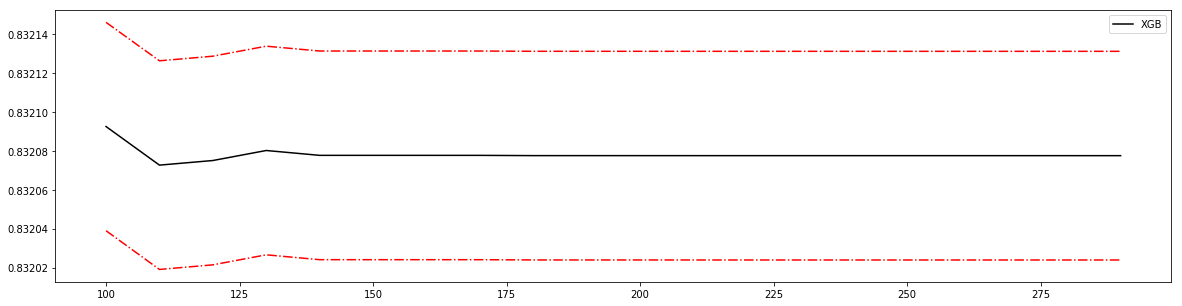

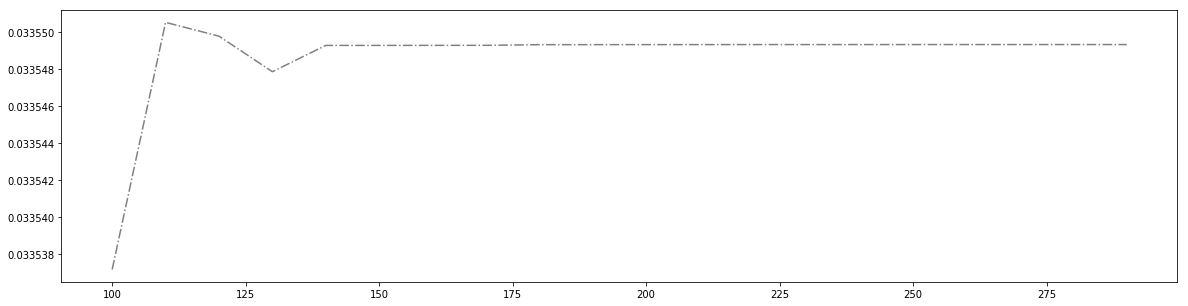

In [35]:
axisx = range(100,300,10)
rs = []
var = []
ge = []
for i in axisx:
    reg = XGBR(n_estimators=i,random_state=420)
    cvresult = CVS(reg,Xtrain,Ytrain,cv=cv)
    rs.append(cvresult.mean())
    var.append(cvresult.var())
    ge.append((1 - cvresult.mean())**2+cvresult.var())
    print(axisx[rs.index(max(rs))],max(rs),var[rs.index(max(rs))])
print(axisx[var.index(min(var))],rs[var.index(min(var))],min(var))
print(axisx[ge.index(min(ge))],rs[ge.index(min(ge))],var[ge.index(min(ge))],min(ge))
rs = np.array(rs)
var = np.array(var)*0.01
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="black",label="XGB")
#添加方差线
plt.plot(axisx,rs+var,c="red",linestyle='-.')
plt.plot(axisx,rs-var,c="red",linestyle='-.')
plt.legend()
plt.show()
#看看泛化误差的可控部分如何？
plt.figure(figsize=(20,5))
plt.plot(axisx,ge,c="gray",linestyle='-.')
plt.show()

##### 验证模型效果是否提高了

In [36]:
time0 = time()
print(XGBR(n_estimators=100,random_state=420).fit(Xtrain,Ytrain).score(Xtest,Ytest))
print(time()-time0)

0.9050988954757183
0.14891433715820312


In [37]:
time0 = time()
print(XGBR(n_estimators=660,random_state=420).fit(Xtrain,Ytrain).score(Xtest,Ytest))
print(time()-time0)

0.9050526024842831
0.33980441093444824


In [38]:
time0 = time()
print(XGBR(n_estimators=180,random_state=420).fit(Xtrain,Ytrain).score(Xtest,Ytest))
print(time()-time0)

0.9050526024842831
0.2128770351409912


#### **梯度提升树**
#### 从总的数据集随机抽样，得到一个新的数据集，将新的数据集里判断错的数据返回给原始数据集，原始数据集   
#### 会加大判断错的数据的权重，然后再次随机抽样的到一个新的数据集，如此往复，直到第k次。每一次抽样都是   
#### 在前一次的基础上进行的，精度都比之前提升了一点。

1.0 0.8320775357206376


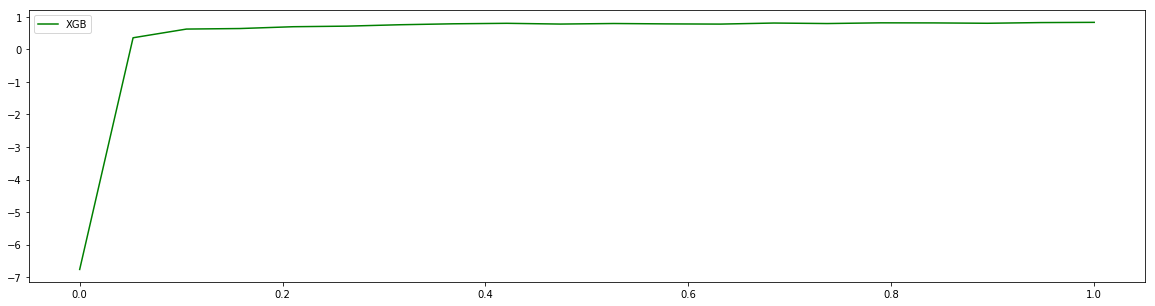

In [39]:
axisx = np.linspace(0,1,20)
rs = []
for i in axisx:
    reg = XGBR(n_estimators=180,subsample=i,random_state=420)
    rs.append(CVS(reg,Xtrain,Ytrain,cv=cv).mean())
print(axisx[rs.index(max(rs))],max(rs))
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="green",label="XGB")
plt.legend()
plt.show()

1.0 0.8320775357206376 0.005351385532660411
0.75 0.8173343595502246 0.002674386743068867
1.0 0.8320775357206376 0.005351385532660411 0.033549339542314156


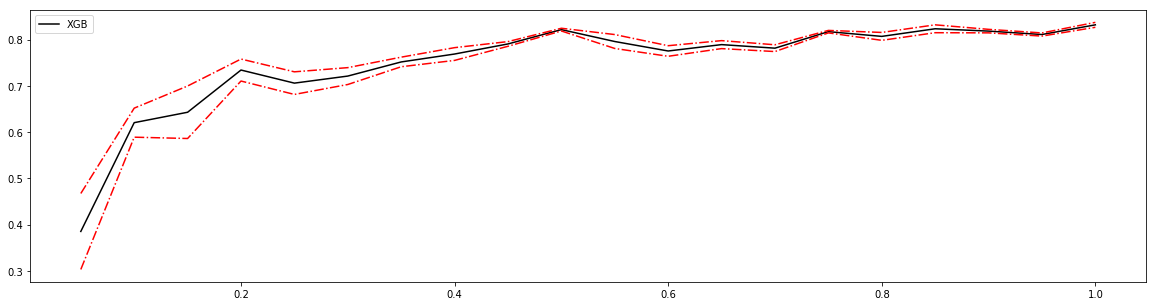

In [40]:
#细化学习曲线
axisx = np.linspace(0.05,1,20)
rs = []
var = []
ge = []
for i in axisx:
    reg = XGBR(n_estimators=180,subsample=i,random_state=420)
    cvresult = CVS(reg,Xtrain,Ytrain,cv=cv)
    rs.append(cvresult.mean())
    var.append(cvresult.var())
    ge.append((1 - cvresult.mean())**2+cvresult.var())
print(axisx[rs.index(max(rs))],max(rs),var[rs.index(max(rs))])
print(axisx[var.index(min(var))],rs[var.index(min(var))],min(var))
print(axisx[ge.index(min(ge))],rs[ge.index(min(ge))],var[ge.index(min(ge))],min(ge))
rs = np.array(rs)
var = np.array(var)
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="black",label="XGB")
plt.plot(axisx,rs+var,c="red",linestyle='-.')
plt.plot(axisx,rs-var,c="red",linestyle='-.')
plt.legend()
plt.show()

In [41]:
# 继续细化学习曲线
axisx = np.linspace(0.75,1,25)
reg = XGBR(n_estimators=180,subsample=0.770833333333,random_state=420).fit(Xtrain,Ytrain)

In [42]:
reg.score(Xtest,Ytest)

0.902174931381379

In [43]:
MSE(Ytest,reg.predict(Xtest))

9.10300268941902

##### XGboost的迭代是每棵树加上使损失函数最优的下一颗树乘以权重

In [44]:
# 定义一个评分函数，这个评分函数能够帮助我们直接打印Xtrain上的交叉验证的结果。
def regassess(reg,Xtrain,Ytrain,cv,scoring = ["r2"],show=True):
    score = []
    for i in range(len(scoring)):
        if show:
            print("{}:{:.2f}".format(scoring[i],CVS(reg
                                                   ,Xtrain,Ytrain
                                                   ,cv=cv
                                                   ,scoring=scoring[i]).mean()))
        score.append(CVS(reg,Xtrain,Ytrain,cv=cv,scoring=scoring[i]).mean())
    return score

In [45]:
regassess(reg,Xtrain,Ytrain,cv,scoring=["r2","neg_mean_squared_error"])

r2:0.79
neg_mean_squared_error:-14.12


[0.7944643548951424, -14.116785448848711]

In [46]:
regassess(reg,Xtrain,Ytrain,cv,scoring=["r2","neg_mean_squared_error"],show=False)

[0.7944643548951424, -14.116785448848711]

In [47]:
from time import time
import datetime
for i in [0,0.2,0.5,1]:
    time0 = time()
    reg = XGBR(n_estimators=180,random_state=420,learning_rate=i)
    print("learning_rate = {}".format(i))
    regassess(reg,Xtrain,Ytrain,cv,scoring=["r2","neg_mean_squared_error"])
    print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))
    print("\t")

learning_rate = 0
r2:-6.76
neg_mean_squared_error:-567.55
00:02:966297
	
learning_rate = 0.2
r2:0.83
neg_mean_squared_error:-12.30
00:04:341508
	
learning_rate = 0.5
r2:0.82
neg_mean_squared_error:-12.48
00:02:959302
	
learning_rate = 1
r2:0.71
neg_mean_squared_error:-20.06
00:02:010842
	


0.1 0.8354667463386021


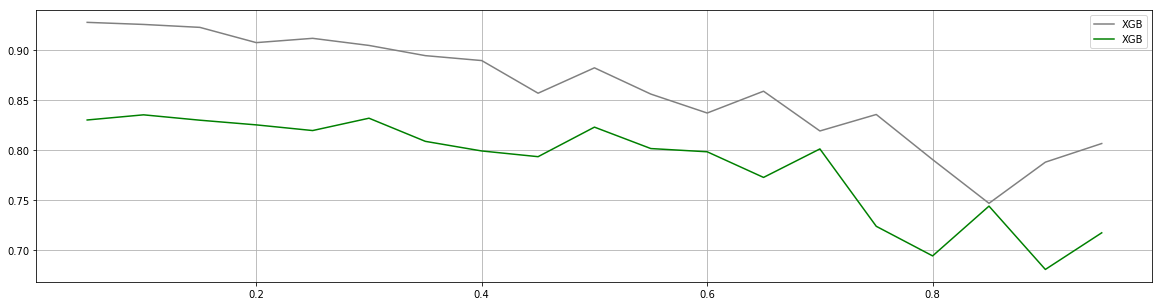

In [48]:
axisx = np.arange(0.05,1,0.05)
rs = []
te = []
for i in axisx:
    reg = XGBR(n_estimators=180,random_state=420,learning_rate=i)
    score = regassess(reg,Xtrain,Ytrain,cv,scoring =["r2","neg_mean_squared_error"],show=False)
    test = reg.fit(Xtrain,Ytrain).score(Xtest,Ytest)
    rs.append(score[0])
    te.append(test)
print(axisx[rs.index(max(rs))],max(rs))
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(axisx,te,c="gray",label="XGB")
plt.plot(axisx,rs,c="green",label="XGB")
plt.legend()
plt.show()

##### 选择弱评估器

In [49]:
for booster in ["gbtree","gblinear","dart"]:
    reg = XGBR(n_estimators=180
              ,learning_rate=0.1
              ,random_state=420
              ,booster=booster).fit(Xtrain,Ytrain)
    print(booster)
    print(reg.score(Xtest,Ytest))

gbtree
0.9260984298390122
gblinear
0.6492642374842065
dart
0.9260984373654244


## **损失函数的核心是平衡模型的泛化能力** 

#### XGB的目标函数 = 传统损失函数 + 模型复杂度

##### 比较XGB和sklearn效果如何
***

In [50]:
reg = XGBR(n_estimators=180,random_state=420).fit(Xtrain,Ytrain)
reg.score(Xtest,Ytest)

0.9050526024842831

In [51]:
MSE(Ytest,reg.predict(Xtest))

8.835224213421986

In [52]:
import xgboost as xgb

In [55]:
dtrain = xgb.DMatrix(Xtrain,Ytrain)
dtest = xgb.DMatrix(Xtest,Ytest)

In [58]:
dtrain

In [59]:
param = {'silent':True,'objective':'reg:linear','eta':0.1}
num_round = 180

In [60]:
bst = xgb.train(param,dtrain,num_round)

[15:45:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[15:45:11] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:45:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


In [61]:
from sklearn.metrics import r2_score

In [62]:
r2_score(Ytest,bst.predict(dtest))

0.9260984298390122

In [63]:
MSE(Ytest,bst.predict(dtest))

6.87682821415069

从r方和MSE可以看出，都是XGboost库本身的效果更好，所以尽量使用XGB库本身来调用，不要使用sklearn

In [ ]:
import xgboost as xgb
dtrain = xgb.DMatrix(Xtrain,Ytrain)
dtest = xgb.DMatrix(Xtest,Ytest)

param = {'silent':True,'objective':'reg:linear','eta':0.1}
bst = xgb.train(param,dtrain,num_round)
from sklearn.metrics import r2_score
r2_score(Ytest,bst.predict(dtest))
MSE(Ytest,bst.predict(dtest))

In [ ]:
# 使用网格搜索来查找最佳参数组合lambda和alpha
from sklearn.model_selection import GridSearchCV
param = {"reg_alpha":np.arange(0,5,0.05)."reg_lambda":np.arange(0,2,0.05)}
gscv = GridSearchCV(reg,param_grid=param,scoring="neg_mean_squared_error",cv=cv)

time0 = time()
print(datetime.datetime.fromtimestamp(time()-time0).strfstamp("%M:%S:%f"))
gscv.best_score_
gscv.best_params_
pred = gscv.predict(Xtest)

from sklearn.metrics import r2_score,mean_squared_error as MSE
r2_score(Ytest,pred)
MSE(Ytest,preds)

0.8 0.8408699414823027 0.00589139909078231
4.55 0.8270850755911514 0.004605424043983733
0.6000000000000001 0.8398453632476865 0.004660987707966449 0.030310495381231917


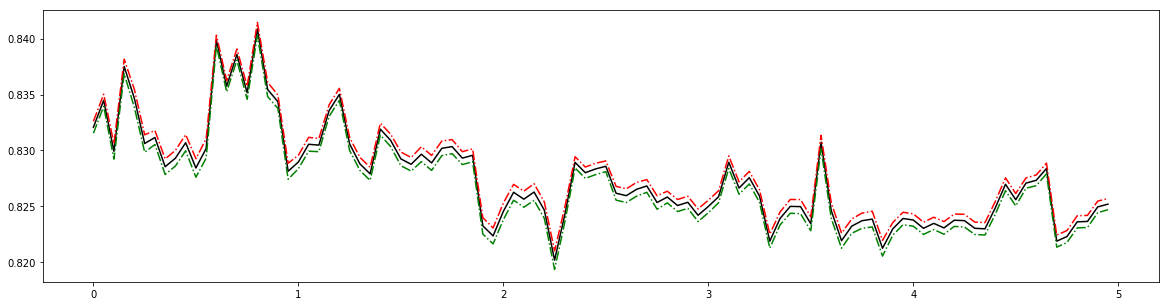

In [14]:
# 让gamma在0~5取学习曲线，不推荐这种方法
from sklearn.model_selection import cross_val_score as CVS
from xgboost import XGBRegressor as XGBR
axisx = np.arange(0,5,0.05)
rs = []  # 偏差
var = []  # 方差
ge = []
for i in axisx:
    reg = XGBR(n_estimators=180,random_state=420,gamma=i)
    result = CVS(reg,Xtrain,Ytrain,cv=cv)
    rs.append(result.mean())
    var.append(result.var())
    ge.append((1 - result.mean())**2+result.var())
print(axisx[rs.index(max(rs))],max(rs),var[rs.index(max(rs))])
print(axisx[var.index(min(var))],rs[var.index(min(var))],min(var))
print(axisx[ge.index(min(ge))],rs[ge.index(min(ge))],var[ge.index(min(ge))],min(ge))
rs = np.array(rs)
var = np.array(var)*0.1
plt.figure(figsize=[20,5])
plt.plot(axisx,rs,c="black",label='XGB')
plt.plot(axisx,rs+var,c='red',linestyle='-.')
plt.plot(axisx,rs-var,c='green',linestyle='-.')

In [27]:
cvresult1.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,17.105578,0.129116,17.163215,0.584297
1,12.337973,0.097558,12.519735,0.473457
2,8.994071,0.065756,9.404534,0.472309
3,6.629481,0.050323,7.250335,0.500342
4,4.954406,0.033209,5.920812,0.591874


[14:37:09] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { obj, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:37:09] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { obj, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:37:09] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { obj, silent } might not be used.

  This may not be accurate due to some parameters are only used in langu

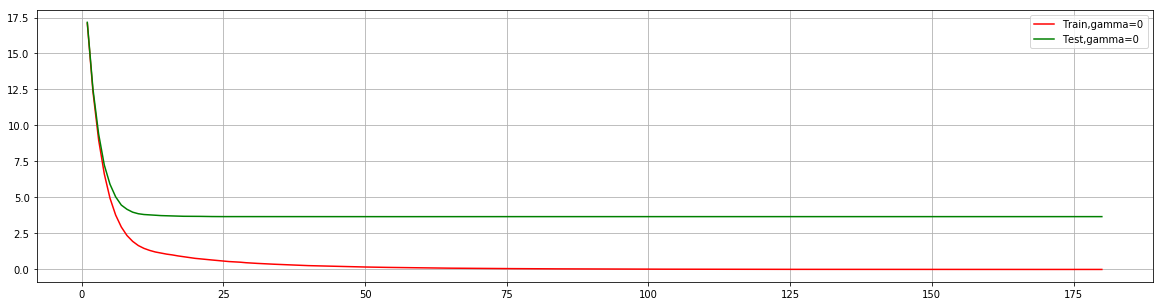

In [29]:
import xgboost as xgb
from time import time
dfull = xgb.DMatrix(X,y)
param1 = {'silent':True,'obj':'reg:linear','gamma':0}
num_round = 180
k_fold=5
time0 = time()
cvresult1 = xgb.cv(param1,dfull,num_round,k_fold)
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))
cvresult1
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(range(1,181),cvresult1.iloc[:,0],c='red',label='Train,gamma=0')
plt.plot(range(1,181),cvresult1.iloc[:,2],c='green',label='Test,gamma=0')
plt.legend(loc='best')
plt.show()

[14:46:58] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { obj, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:46:58] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { obj, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:46:58] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { obj, silent } might not be used.

  This may not be accurate due to some parameters are only used in langu

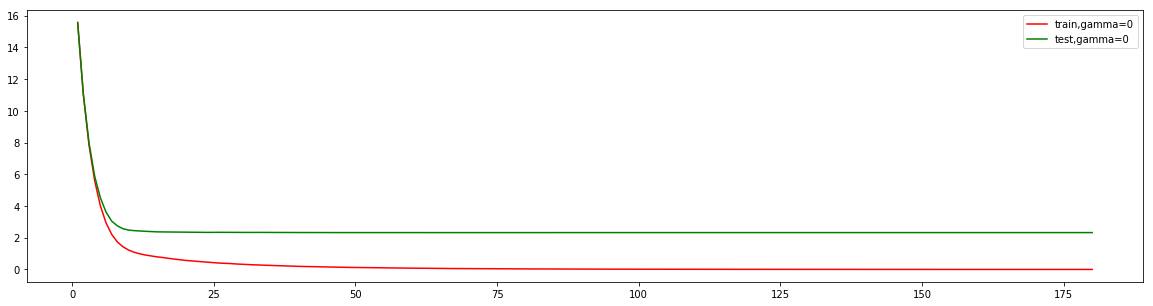

In [31]:
param1 = {"silent":True,'obj':'reg:linear','gamma':0,'eval_metric':'mae'}
num_round = 180
n_fold = 5
cvresult1 = xgb.cv(param1,dfull,num_round,n_fold)
plt.figure(figsize=(20,5))
plt.plot(range(1,181),cvresult1.iloc[:,0],c='red',label='train,gamma=0')
plt.plot(range(1,181),cvresult1.iloc[:,2],c='green',label='test,gamma=0')
plt.legend()
plt.show()

[14:59:06] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { obj, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:59:06] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { obj, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:59:06] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { obj, silent } might not be used.

  This may not be accurate due to some parameters are only used in langu

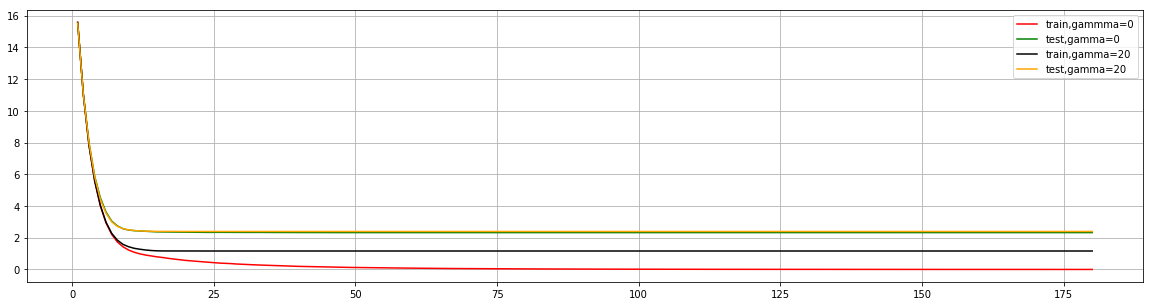

In [33]:
# 调整gammma,观察变化
param1 = {'silent':False,'obj':"reg:linear",'gamma':0,'eval_metric':'mae'}
param2 = {'silent':False,'obj':'reg:linear','gamma':20,'eval_metric':'mae'}
num_round = 180
n_fold = 5
time0 = time()
cvresult1 = xgb.cv(param1,dfull,num_round,n_fold)
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))
cvresult1
time1 = time()
cvresult2 = xgb.cv(param2,dfull,num_round,n_fold)
print(datetime.datetime.fromtimestamp(time()-time1).strftime("%M:%S:%f"))

plt.figure(figsize=[20,5])
plt.grid()
plt.plot(range(1,181),cvresult1.iloc[:,0],c='red',label='train,gammma=0')
plt.plot(range(1,181),cvresult1.iloc[:,2],c='green',label='test,gamma=0')
plt.plot(range(1,181),cvresult2.iloc[:,0],c='black',label='train,gamma=20')
plt.plot(range(1,181),cvresult2.iloc[:,2],c='orange',label='test,gamma=20')
plt.legend()
plt.show()

[15:38:39] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { nfold, obj, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:38:39] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { nfold, obj, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:38:39] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { nfold, obj, silent } might not be used.

  This may not be accurate due to some parameters a

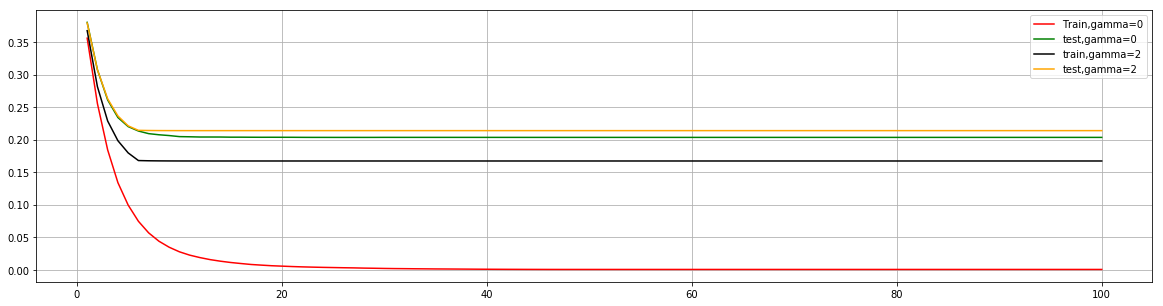

In [36]:
from sklearn.datasets import load_breast_cancer
import xgboost as xgb
data = load_breast_cancer()
X = data.data
y = data.target
dfull = xgb.DMatrix(X,y)
num_round = 100
nfold = 5
param1 = {"silent":False,"obj":"binary:logistic","gamma":0,"nfold":5}
param2 = {"silent":False,"obj":"binary:logistic","gamma":2,"nfold":5}

time0 = time()
cvresult1 = xgb.cv(param1,dfull,num_round,nfold)
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))
time1 = time()
cvresult2 = xgb.cv(param2,dfull,num_round,nfold)
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

plt.figure(figsize=[20,5])
plt.grid()
plt.plot(range(1,101),cvresult1.iloc[:,0],c='red',label='Train,gamma=0')
plt.plot(range(1,101),cvresult1.iloc[:,2],c='green',label='test,gamma=0')
plt.plot(range(1,101),cvresult2.iloc[:,0],c='black',label='train,gamma=2')
plt.plot(range(1,101),cvresult2.iloc[:,2],c='orange',label='test,gamma=2')
plt.legend()
plt.show()

[16:04:38] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { nfold, obj, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:04:38] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { nfold, obj, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:04:38] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { nfold, obj, silent } might not be used.

  This may not be accurate due to some parameters a

NameError: name 'tiem0' is not defined

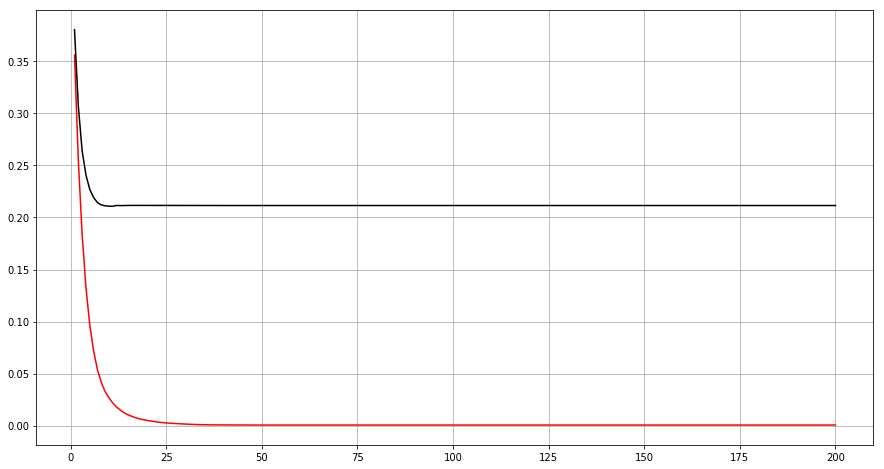

In [42]:
dfull = xgb.DMatrix(X,y)
param1 = {'silent':True
         ,'obj':'reg:linear'
         ,'subsample':1
         ,'max_depth':6
         ,'eta':0.3
         ,'gamma':0
         ,'lambda':1
         ,'alpha':0
         ,'colsample_bytree':1
         ,'colsample_bylevel':1
         ,'colsample_bynode':1
         ,'nfold':5
         }
num_round = 200

time0 = time()
cvresult1 = xgb.cv(param1,dfull,num_round)
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

fig,ax = plt.subplots(1,figsize=(15,8))
# ax.set_ylim(top=5)
ax.grid()
ax.plot(range(1,201),cvresult1.iloc[:,0],c='red',label='train,original')
ax.plot(range(1,201),cvresult1.iloc[:,2],c='black',label='test,original')

param2 = {'silent':True
         ,'obj':'reg:linear'
         ,'eta':0.05
         ,'gamma':0
         ,'lambda':1
         ,'alpha':0
         ,'nfold':5}
param3 = {'silent':True
         ,'obj':'reg:linear'
         ,'max_depth':2
         ,'eta':0.05
         ,'gamma':0
         ,'lambda':1
         ,'alpha':0
         ,'nfold':5}
time0 = time()
cvresult2 = xgb.cv(param2,dfull,num_round)
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))
time0 = time()
cvresult3 = xgb.cv(param3,dfull,num_round)
print(datetime.datetime.fromtimestamp(time()-tiem0).strftime("%M:%S:%f"))
ax.plot(range(1,201),cvresult2.iloc[:,0],c='red',label='Train,last')
ax.plot(range(1,201),cvresult2.iloc[:,2],c='green',label='test,last')
ax.plot(range(1,201),cvresult3.iloc[:,0],c='black',label='train,this')
ax.plot(range(1,201),cvresult3.iloc[:,2],c='orange',label='test,this')
ax.legend(fontsize='xx-large')
plt.show()

#### 所以一般调参的顺序是，先用网格搜索调整n_estimators和eta，然后调整gamma或者max_depth,接着调整纵向抽样，最后正则化

#### XGB中的样本不均衡问题

In [44]:
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from xgboost import XGBClassifier as XGBC
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split as TTS
from sklearn.metrics import confusion_matrix as cm,recall_score as recall,roc_auc_score as auc

In [45]:
class_1 = 500
class_2 = 50
centers = [[0.0,0.0],[2.0,2.0]]
clusters_std = [1.5,0.5]
X,y = make_blobs(n_samples=[class_1,class_2]
                ,centers=centers
                ,cluster_std=clusters_std
                ,random_state=0,shuffle=False)

In [46]:
Xtrain,Xtest,Ytrain,Ytest = TTS(X,y,test_size=0.3,random_state=420)

In [47]:
Xtrain.shape

(385, 2)

In [52]:
(y == 1).sum()/y.shape[0]

0.09090909090909091

In [53]:
clf = XGBC().fit(Xtrain,Ytrain)
ypred = clf.predict(Xtest)

In [54]:
clf.score(Xtest,Ytest)

0.9272727272727272

In [55]:
cm(Ytest,ypred,labels=[1,0])

array([[  9,   4],
       [  8, 144]], dtype=int64)

In [56]:
recall(Ytest,ypred)

0.6923076923076923

In [57]:
auc(Ytest,clf.predict_proba(Xtest)[:,1])

0.9701417004048585

In [58]:
clf_ = XGBC(scale_pos_weight=10).fit(Xtrain,Ytrain)
ypred_ = clf_.predict(Xtest)
clf_.score(Xtest,Ytest)

0.9333333333333333

In [60]:
cm(Ytest,ypred_,labels=[1,0])

array([[ 10,   3],
       [  8, 144]], dtype=int64)

In [61]:
recall(Ytest,ypred_)

0.7692307692307693

In [62]:
auc(Ytest,clf_.predict_proba(Xtest)[:,1])

0.9696356275303644

In [63]:
for i in [1,5,10,20,30]:
    clf_ = XGBC(scale_pos_weight=i).fit(Xtrain,Ytrain)
    ypred_ = clf_.predict(Xtest)
    print(i)
    print("\tAccuracy:{}".format(clf_.score(Xtest,Ytest)))
    print("\tRecall:{}".format(recall(Ytest,ypred_)))
    print("\tAUC:{}".format(auc(Ytest,clf_.predict_proba(Xtest)[:,1])))


1
	Accuracy:0.9272727272727272
	Recall:0.6923076923076923
	AUC:0.9701417004048585
5
	Accuracy:0.9393939393939394
	Recall:0.8461538461538461
	AUC:0.9660931174089069
10
	Accuracy:0.9333333333333333
	Recall:0.7692307692307693
	AUC:0.9696356275303644
20
	Accuracy:0.9333333333333333
	Recall:0.7692307692307693
	AUC:0.9686234817813765
30
	Accuracy:0.9393939393939394
	Recall:0.8461538461538461
	AUC:0.9701417004048583


In [64]:
clf_ = XGBC(scale_pos_weight=20).fit(Xtrain,Ytrain)
ypred_ = clf_.predict(Xtest)
clf_.score(Xtest)

TypeError: score() missing 1 required positional argument: 'y'

In [65]:
cm(Ytest,ypred_,labels=[1,0])

array([[ 10,   3],
       [  8, 144]], dtype=int64)

In [66]:
clf_.score(Xtest,Ytest)

0.9333333333333333

In [67]:
dtrain = xgb.DMatrix(Xtrain,Ytrain)
dtest = xgb.DMatrix(Xtest,Ytest)

In [68]:
param = {"silent":False,"objective":"binary:logistic","eta":0.1,"scale_pos_weight":1}
num_round = 100

In [69]:
bst = xgb.train(param,dtrain,num_round)

[16:40:37] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [70]:
pred = bst.predict(dtest)

In [71]:
ypred = pred.copy()

In [72]:
ypred

array([0.00110357, 0.00761518, 0.00110357, 0.00110357, 0.93531454,
       0.00466839, 0.00110357, 0.00110357, 0.00110357, 0.00110357,
       0.00110357, 0.00410493, 0.00454478, 0.00571528, 0.00751026,
       0.00110357, 0.00110357, 0.00110357, 0.00110357, 0.00110357,
       0.00110357, 0.00110357, 0.00110357, 0.00110357, 0.00110357,
       0.00712637, 0.00110357, 0.00110357, 0.00110357, 0.00110357,
       0.00110357, 0.00110357, 0.00110357, 0.00793251, 0.00466839,
       0.00110357, 0.00339395, 0.00657186, 0.00110357, 0.00457053,
       0.00571528, 0.0026763 , 0.00110357, 0.00110357, 0.00110357,
       0.00884932, 0.00712637, 0.00110357, 0.00712637, 0.00466839,
       0.00110357, 0.00110357, 0.00712637, 0.00110357, 0.00110357,
       0.00110357, 0.00110357, 0.63748044, 0.00110357, 0.00793251,
       0.00110357, 0.00451971, 0.00644181, 0.00110357, 0.00110357,
       0.00110357, 0.00110357, 0.00751026, 0.00712637, 0.00110357,
       0.00866458, 0.00110357, 0.00110357, 0.00110357, 0.91610

In [73]:
ypred[pred > 0.5] = 1
ypred[ypred != 1] = 0

In [74]:
ypred

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.], dtype=float32)

In [75]:
scale_pos_weight = [1,5,10]

In [76]:
names = ["negative vs postive: 1"
        ,"negative vs postive: 5"
        ,"negative vs postive: 10"]